In [1]:
# import necessary packages
import xarray as xr
import geopandas as gpd
import READ_EDAB_Utilities_py as reupy
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cartopy.crs as ccrs
import numpy as np
import pandas as pn
import seaborn as sns
import rioxarray
from shapely.geometry import mapping

In [2]:
# Load Hubert's debiased ROMS + GLORYS dataset
directory = "C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/bt_hubert/bt_revised_metadata_032024/"

bt = xr.open_dataset(directory + 'bottom_temp_1959.nc')

# Iterate over files in directory
for file in os.listdir(directory):
    filename = directory + file
    bt_yr = xr.open_dataset(directory + file)
    bt = xr.merge([bt, bt_yr])

In [3]:
# load the mom6 data
bt_m6 = xr.open_dataset('ocean_daily.19930101-20191231.tob.nc')

In [4]:
# Load the shapefiles
GOM = gpd.read_file('OceanModelValidationPolygons/GOM/OceanProductPoly_GOM.shp')

In [5]:
SNEin = gpd.read_file('OceanModelValidationPolygons/inshore SNE/OceanProductPoly_SNEinshore.shp')

In [73]:
SNEoff = gpd.read_file('OceanModelValidationPolygons/offshore SNE/OceanProductPoly_SNEoffshore.shp')

In [6]:
# Haley's function which allows you to clip to multiple areas at the same time
def clip_xr(ds, lon_name, lat_name, shp, projection=None):
    ds.rio.set_spatial_dims(x_dim=lon_name, y_dim=lat_name, inplace=True)
    try:
        ds.rio.write_crs(projection, inplace=True)
    except:
        ds.rio.write_crs("EPSG:4326", inplace=True)
    clipped = ds.rio.clip(shp.geometry.apply(mapping), shp.crs, drop=True)
    return clipped

In [7]:
# assign crs of gom
gom = GOM.to_crs('EPSG:4326')

In [71]:
# make this mom6 a little smaller so it takes less time
bt_m6_cut = bt_m6.sel(lat = slice(35, 45), lon = slice(360-80, 360-65))
#lon needs to be in degrees east for the clip_xr function
bt_m6_cut = bt_m6_cut.assign_coords(lon = -1*( 360 - bt_m6_cut.lon))

In [74]:
# clip data to the shapes
bt_m6_gom = reupy.crop_nd(bt_m6_cut, 'lon','lat', gom)
bt_gl_gom = reupy.crop_nd(bt, 'longitude','latitude', gom)
bt_m6_snein = clip_xr(bt_m6_cut, 'lon', 'lat', SNEin)
bt_gl_snein = clip_xr(bt, 'longitude', 'latitude', SNEin)
bt_m6_sneoff = reupy.crop_nd(bt_m6_cut, 'lon', 'lat', SNEoff)
bt_gl_sneoff = reupy.crop_nd(bt, 'longitude','latitude', SNEoff)

Text(-68, 43, 'n = 305')

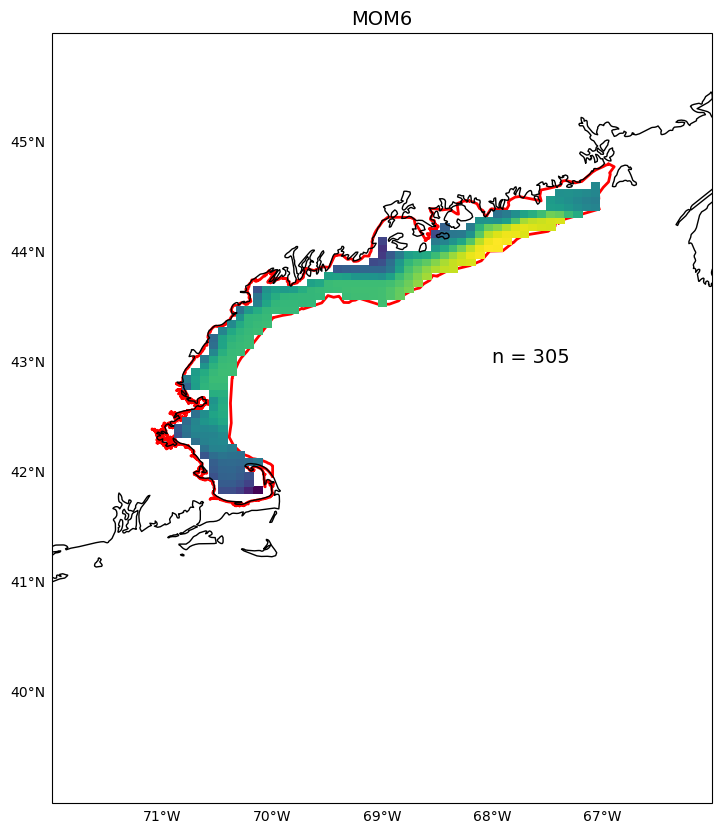

In [17]:
fig, ax = plt.subplots(figsize = [10,10], subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-72, -66, 39, 46], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.pcolor(bt_m6_gom.lon, bt_m6_gom.lat, bt_m6_gom.tob[10,:,:])
ax.add_geometries(gom.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', linewidth = 2,zorder = 0)
plt.title('MOM6', fontsize = 14)
ax.annotate('n = 305', [-68,43], xycoords = 'data', fontsize = 14)

Text(-68, 43, 'n = 132')

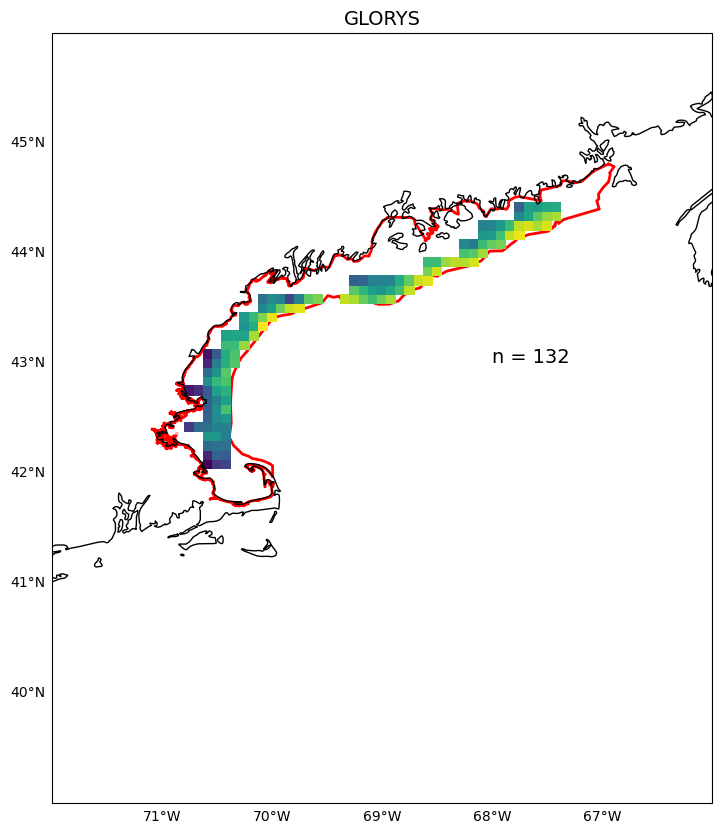

In [18]:
fig, ax = plt.subplots(figsize = [10,10], subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-72, -66, 39, 46], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.pcolor(bt_gl_gom.longitude, bt_gl_gom.latitude, bt_gl_gom.sea_water_temperature_at_sea_floor[10,:,:])
ax.add_geometries(gom.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', linewidth = 2,zorder = 0)
plt.title('GLORYS', fontsize = 14)
ax.annotate('n = 132', [-68,43], xycoords = 'data', fontsize = 14)

Text(-71.5, 39, 'n = 689')

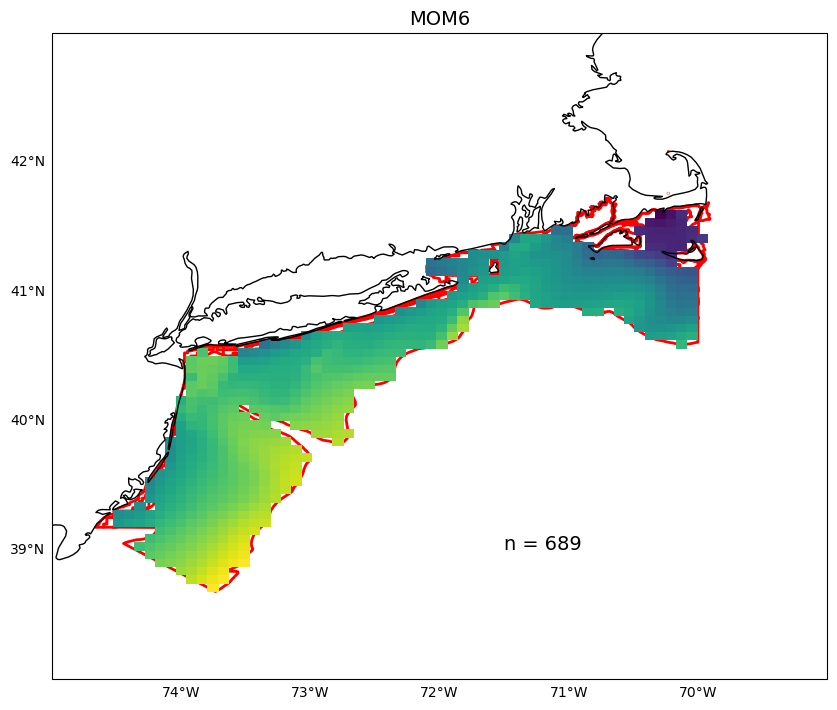

In [29]:
fig, ax = plt.subplots(figsize = [10,10], subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -69, 38, 43], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.pcolor(bt_m6_snein.lon, bt_m6_snein.lat, bt_m6_snein.tob[10,:,:])
ax.add_geometries(SNEin.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', linewidth = 2,zorder = 0)
plt.title('MOM6', fontsize = 14)
ax.annotate('n = 689', [-71.5,39], xycoords = 'data', fontsize = 14)

Text(-71.5, 39, 'n = 419')

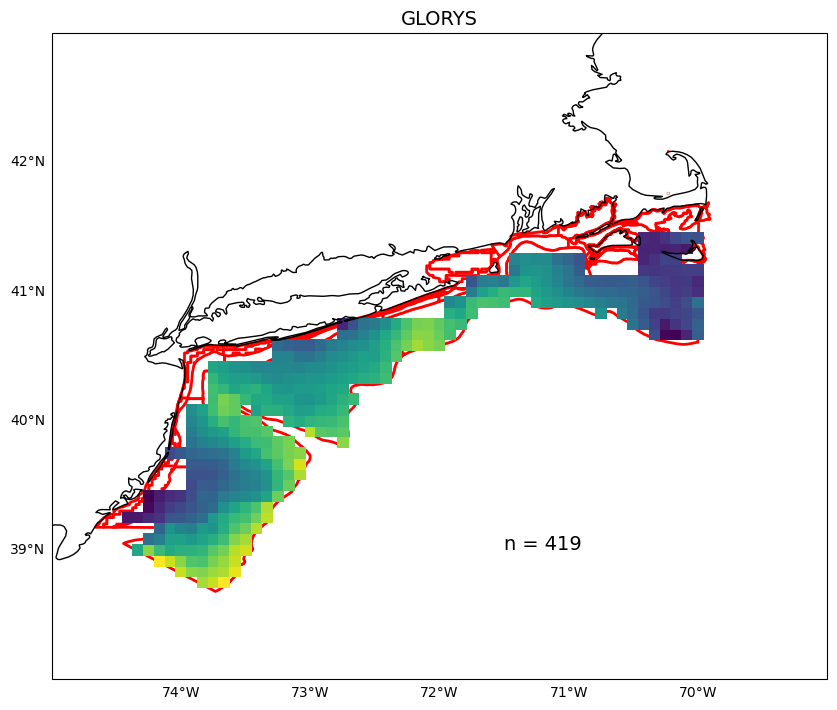

In [28]:
fig, ax = plt.subplots(figsize = [10,10], subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -69, 38, 43], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.pcolor(bt_gl_snein.longitude, bt_gl_snein.latitude, bt_gl_snein.sea_water_temperature_at_sea_floor[10,:,:])
ax.add_geometries(SNEin.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', linewidth = 2,zorder = 0)
plt.title('GLORYS', fontsize = 14)
ax.annotate('n = 419', [-71.5,39], xycoords = 'data', fontsize = 14)

Text(-71.5, 39, 'n = 330')

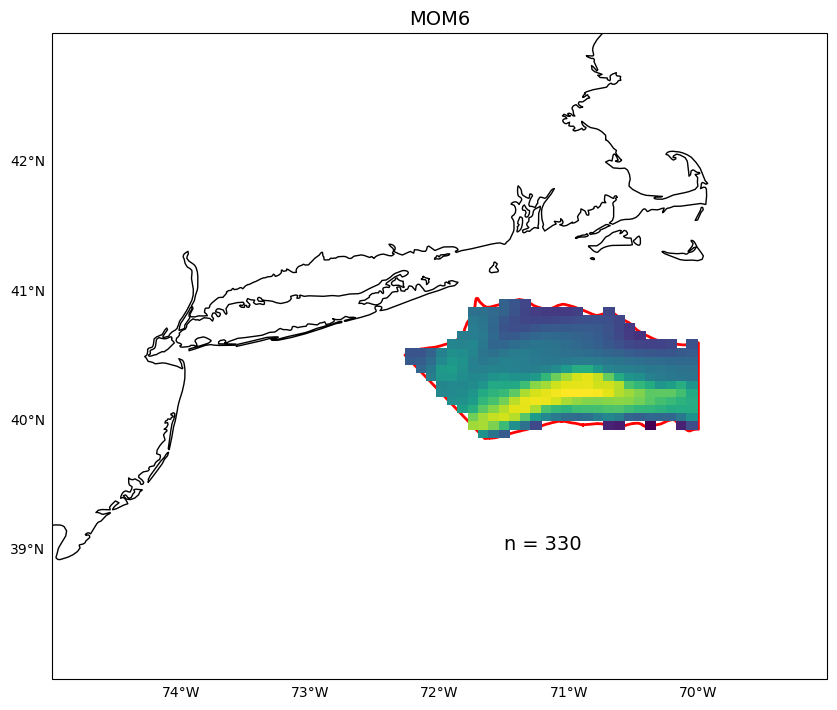

In [78]:
fig, ax = plt.subplots(figsize = [10,10], subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -69, 38, 43], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.pcolor(bt_m6_sneoff.lon, bt_m6_sneoff.lat, bt_m6_sneoff.tob[10,:,:])
ax.add_geometries(SNEoff.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', linewidth = 2,zorder = 0)
plt.title('MOM6', fontsize = 14)
ax.annotate('n = 330', [-71.5,39], xycoords = 'data', fontsize = 14)

Text(-71.5, 39, 'n = 240')

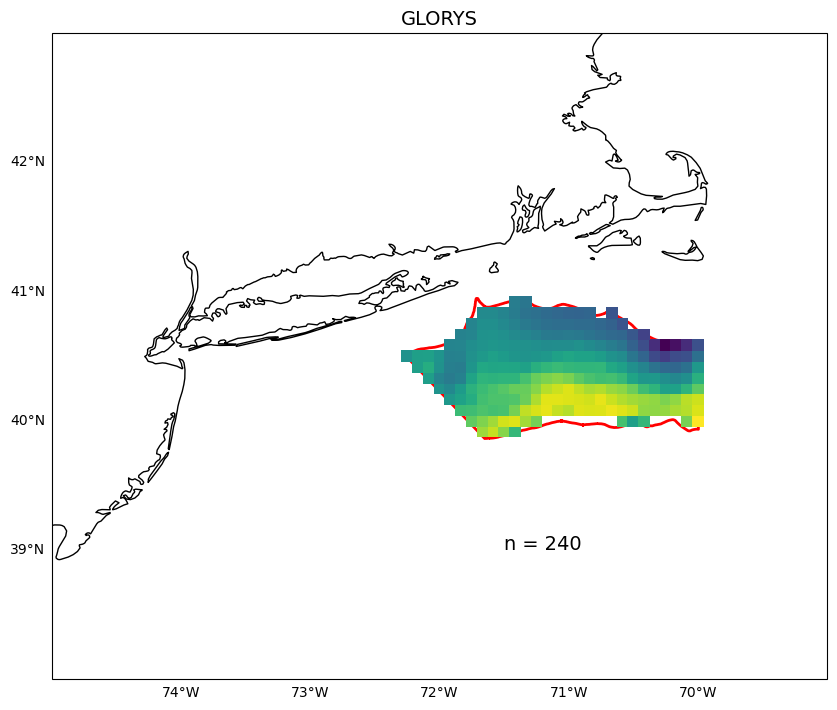

In [81]:
fig, ax = plt.subplots(figsize = [10,10], subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -69, 38, 43], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.pcolor(bt_gl_sneoff.longitude, bt_gl_sneoff.latitude, bt_gl_sneoff.sea_water_temperature_at_sea_floor[10,:,:])
ax.add_geometries(SNEoff.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', linewidth = 2,zorder = 0)
plt.title('GLORYS', fontsize = 14)
ax.annotate('n = 240', [-71.5,39], xycoords = 'data', fontsize = 14)

In [80]:
# number of gridcells
#len(np.where(np.isnan(bt_m6_gom.tob[10,:,:]) == False)[0]) #305
#len(np.where(np.isnan(bt_gl_gom.sea_water_temperature_at_sea_floor[10,:,:]) == False)[0]) #132

#len(np.where(np.isnan(bt_m6_snein.tob[10,:,:]) == False)[0]) #689
#len(np.where(np.isnan(bt_gl_snein.sea_water_temperature_at_sea_floor[10,:,:]) == False)[0]) #419

#len(np.where(np.isnan(bt_m6_sneoff.tob[10,:,:]) == False)[0]) #330
len(np.where(np.isnan(bt_gl_sneoff.sea_water_temperature_at_sea_floor[10,:,:]) == False)[0]) #240

240

In [ ]:
winter spring summer fall mean, std

In [37]:
def seasonal_df(season, data, source, region):
    df = pn.DataFrame({'Season': season,
                       'Value': data[np.where(~np.isnan(data))],
                       'Source': source,
                       'Region': region})
    return df

In [49]:
def reshape_seasons(data, variable, data_source, EPU):
    min_month = [1,4,7,10]
    max_month = [3,6,9,12]
    seasons = ['Winter','Spring','Summer','Fall']
    for i in range(len(min_month)):
        size1 = np.shape(data[variable].sel(time = is_season(data['time.month'], min_month[i], max_month[i])).values)[0]
        size2 = np.shape(data[variable].sel(time = is_season(data['time.month'], min_month[i], max_month[i])).values)[1]
        size3 = np.shape(data[variable].sel(time = is_season(data['time.month'], min_month[i], max_month[i])).values)[2]
        season_i = np.reshape(data[variable].sel(time = is_season(data['time.month'], min_month[i], max_month[i])).values, size1*size2*size3)
        if min_month[i] == 1:
            season_winter_df = seasonal_df(seasons[i],season_i, data_source, EPU)
        if min_month[i] == 4:
            season_spring_df = seasonal_df(seasons[i],season_i, data_source, EPU)
        if min_month[i] == 7:
            season_summer_df = seasonal_df(seasons[i],season_i, data_source, EPU)
        if min_month[i] == 10:
            season_fall_df = seasonal_df(seasons[i],season_i, data_source, EPU)
    return([season_winter_df, season_spring_df, season_summer_df, season_fall_df])

In [82]:
bt_gl_snein_nr = bt_gl_snein.sel(time = slice('1993-01-01', '2024-12-31'))
bt_gl_sneoff_nr = bt_gl_sneoff.sel(time = slice('1993-01-01', '2024-12-31'))

In [65]:
data_snein = pn.concat([pn.concat(reshape_seasons(bt_gl_snein, 'sea_water_temperature_at_sea_floor', 'roms/glorys', 'SNE_inshore')),
                      pn.concat(reshape_seasons(bt_gl_snein_nr, 'sea_water_temperature_at_sea_floor', 'glorys', 'SNE_inshore')),
                      pn.concat(reshape_seasons(bt_m6_snein, 'tob', 'mom6','SNE_inshore'))])

In [83]:
data_sneoff = pn.concat([pn.concat(reshape_seasons(bt_gl_sneoff, 'sea_water_temperature_at_sea_floor', 'roms/glorys', 'SNE_offshore')),
                      pn.concat(reshape_seasons(bt_gl_sneoff_nr, 'sea_water_temperature_at_sea_floor', 'glorys', 'SNE_offshore')),
                      pn.concat(reshape_seasons(bt_m6_sneoff, 'tob', 'mom6','SNE_offshore'))])

In [84]:
data_sneoff

,Season,Value,Source,Region
0,Winter,10.835690,roms/glorys,SNE_offshore
1,Winter,11.570790,roms/glorys,SNE_offshore
2,Winter,10.715420,roms/glorys,SNE_offshore
3,Winter,9.096270,roms/glorys,SNE_offshore
4,Winter,10.863680,roms/glorys,SNE_offshore
...,...,...,...,...
819715,Fall,9.631325,mom6,SNE_offshore
819716,Fall,8.458770,mom6,SNE_offshore
819717,Fall,9.591456,mom6,SNE_offshore
819718,Fall,9.225760,mom6,SNE_offshore


In [31]:
def is_season(month, min_month, max_month):
    return (month >= min_month) & (month <= max_month)

In [35]:
np.shape(bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 1, 3)).values)

123

In [74]:
winter_gom_gl = np.reshape(bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 1, 3)).values, 5596*103*123)
spring_gom_gl = np.reshape(bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 4, 6)).values, 5642*103*123)
summer_gom_gl = np.reshape(bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 7, 9)).values, 5704*103*123)
fall_gom_gl = np.reshape(bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 10, 12)).values, 5704*103*123)

In [91]:
bt_gl_gom_nr = bt_gl_gom.sel(time = slice('1993-01-01', '2024-12-31'))

In [97]:
np.shape(bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 10, 12)).values)

(2576, 103, 123)

In [98]:
winter_gom_gl_nr = np.reshape(bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 1, 3)).values, 2528*103*123)
spring_gom_gl_nr = np.reshape(bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 4, 6)).values, 2548*103*123)
summer_gom_gl_nr = np.reshape(bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 7, 9)).values, 2576*103*123)
fall_gom_gl_nr = np.reshape(bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 10, 12)).values, 2576*103*123)

In [53]:
winter_gom = np.reshape(bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 1, 3)).values, 2436*160*186)
spring_gom = np.reshape(bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 4, 6)).values, 2457*160*186)
summer_gom = np.reshape(bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 7, 9)).values, 2484*160*186)
fall_gom = np.reshape(bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 10, 12)).values, 2484*160*186)

In [55]:
def seasonal_df(season, data, source, region):
    df = pn.DataFrame({'Season': season,
                       'Value': data[np.where(~np.isnan(data))],
                       'Source': source,
                       'Region': region})
    return df

In [56]:
data_winter_gom = seasonal_df('Winter',winter_gom, 'mom6', 'GOM')
data_spring_gom = seasonal_df('Spring',spring_gom, 'mom6', 'GOM')
data_summer_gom = seasonal_df('Summer',summer_gom, 'mom6', 'GOM')
data_fall_gom = seasonal_df('Fall',fall_gom, 'mom6', 'GOM')


In [99]:
data_winter_gom_gl = seasonal_df('Winter',winter_gom_gl, 'roms/glorys', 'GOM')
data_spring_gom_gl = seasonal_df('Spring',spring_gom_gl, 'roms/glorys', 'GOM')
data_summer_gom_gl = seasonal_df('Summer',summer_gom_gl, 'roms/glorys', 'GOM')
data_fall_gom_gl = seasonal_df('Fall',fall_gom_gl, 'roms/glorys', 'GOM')

In [100]:
data_winter_gom_gl_nr = seasonal_df('Winter',winter_gom_gl_nr, 'glorys', 'GOM')
data_spring_gom_gl_nr = seasonal_df('Spring',spring_gom_gl_nr, 'glorys', 'GOM')
data_summer_gom_gl_nr = seasonal_df('Summer',summer_gom_gl_nr, 'glorys', 'GOM')
data_fall_gom_gl_nr = seasonal_df('Fall',fall_gom_gl_nr, 'glorys', 'GOM')

In [101]:
data_gom = pn.concat([data_winter_gom, data_spring_gom, data_summer_gom, data_fall_gom,
                      data_winter_gom_gl, data_spring_gom_gl, data_summer_gom_gl, data_fall_gom_gl,
                     data_winter_gom_gl_nr, data_spring_gom_gl_nr, data_summer_gom_gl_nr, data_fall_gom_gl_nr])

Text(0, 0.5, 'degrees C')

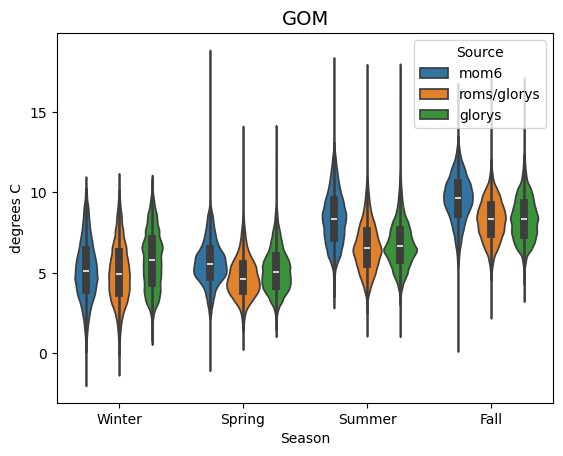

In [102]:
chart = sns.violinplot(data_gom, x = 'Season', y = 'Value', hue = 'Source' )
chart.set_title('GOM', fontsize = 14)
chart.set_ylabel('degrees C')

Text(0, 0.5, 'degrees C')

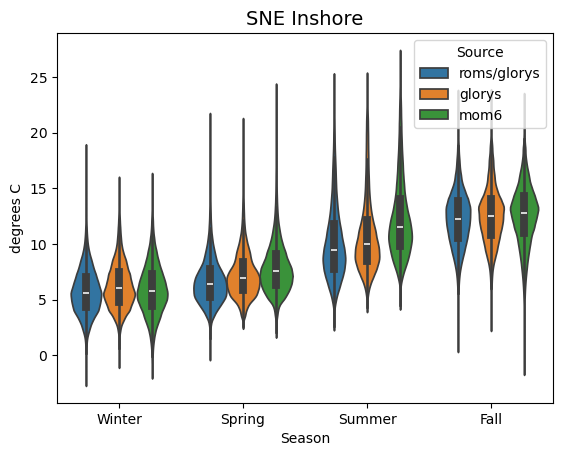

In [67]:
chart = sns.violinplot(data_snein, x = 'Season', y = 'Value', hue = 'Source' )
chart.set_title('SNE Inshore', fontsize = 14)
chart.set_ylabel('degrees C')

Text(0, 0.5, 'degrees C')

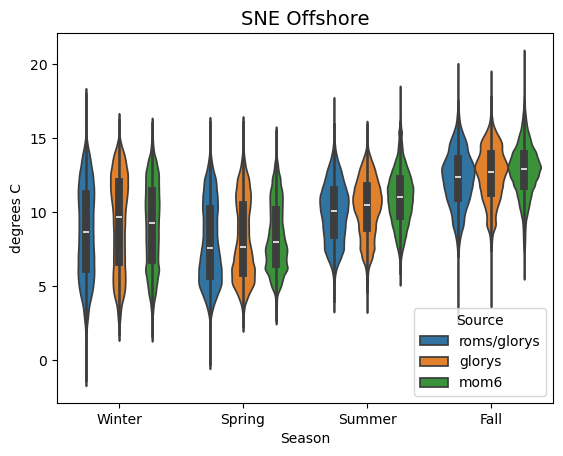

In [85]:
chart = sns.violinplot(data_sneoff, x = 'Season', y = 'Value', hue = 'Source' )
chart.set_title('SNE Offshore', fontsize = 14)
chart.set_ylabel('degrees C')

C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


Text(0.5, 1.0, 'GOM')

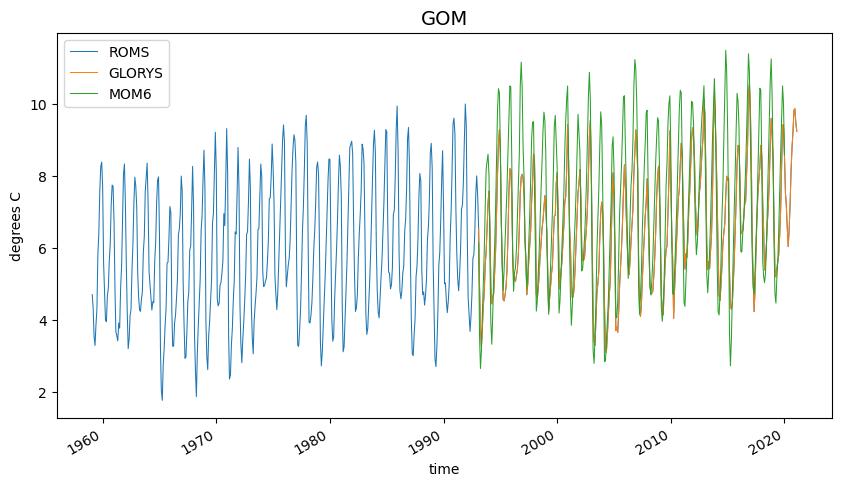

In [124]:
fig, ax = plt.subplots(figsize = [10,5])
bt_gl_gom.sea_water_temperature_at_sea_floor.resample(time = 'M').mean().mean(['latitude','longitude']).plot(linewidth = 0.75, label = 'ROMS')
bt_gl_gom_nr.sea_water_temperature_at_sea_floor.resample(time = 'M').mean().mean(['latitude','longitude']).plot(linewidth = 0.75, label = 'GLORYS')
bt_m6_gom.tob.resample(time = 'M').mean().mean(['lat','lon']).plot(linewidth = 0.75, label = 'MOM6')
ax.set_ylabel('degrees C')
plt.legend()
ax.set_title('GOM', fontsize = 14)

C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


Text(0.5, 1.0, 'SNE Inshore')

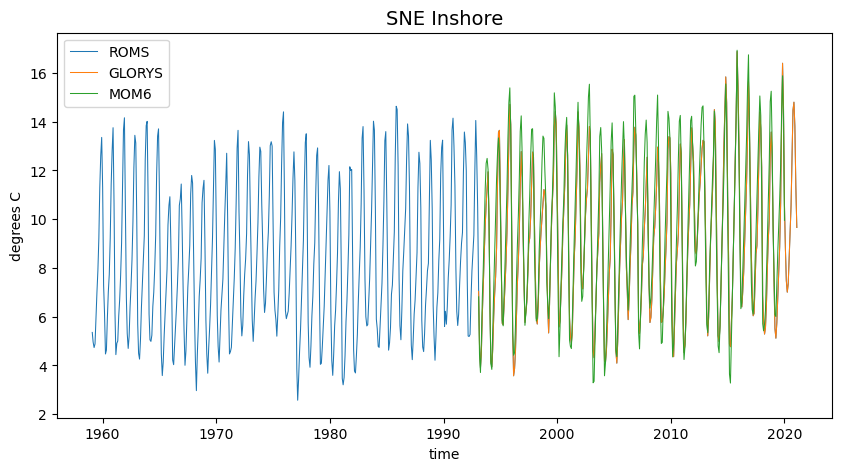

In [68]:
fig, ax = plt.subplots(figsize = [10,5])
bt_gl_snein.sea_water_temperature_at_sea_floor.resample(time = 'M').mean().mean(['latitude','longitude']).plot(linewidth = 0.75, label = 'ROMS')
bt_gl_snein_nr.sea_water_temperature_at_sea_floor.resample(time = 'M').mean().mean(['latitude','longitude']).plot(linewidth = 0.75, label = 'GLORYS')
bt_m6_snein.tob.resample(time = 'M').mean().mean(['lat','lon']).plot(linewidth = 0.75, label = 'MOM6')
ax.set_ylabel('degrees C')
plt.legend()
ax.set_title('SNE Inshore', fontsize = 14)

C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


Text(0.5, 1.0, 'SNE Offshore')

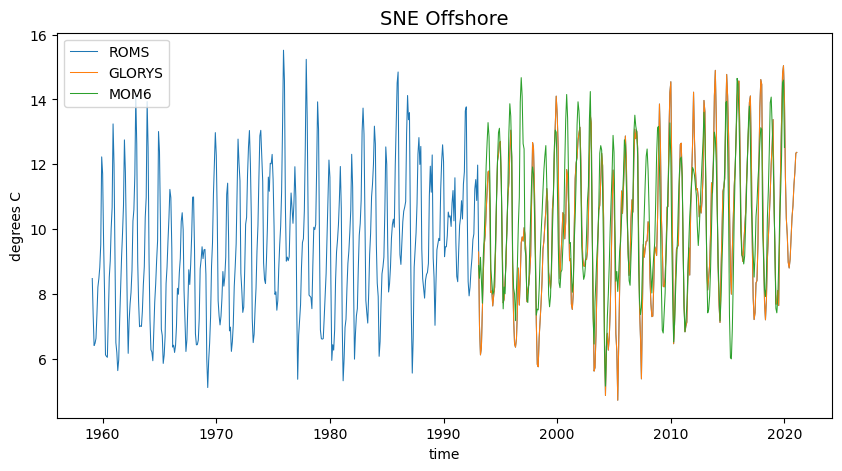

In [86]:
fig, ax = plt.subplots(figsize = [10,5])
bt_gl_sneoff.sea_water_temperature_at_sea_floor.resample(time = 'M').mean().mean(['latitude','longitude']).plot(linewidth = 0.75, label = 'ROMS')
bt_gl_sneoff_nr.sea_water_temperature_at_sea_floor.resample(time = 'M').mean().mean(['latitude','longitude']).plot(linewidth = 0.75, label = 'GLORYS')
bt_m6_sneoff.tob.resample(time = 'M').mean().mean(['lat','lon']).plot(linewidth = 0.75, label = 'MOM6')
ax.set_ylabel('degrees C')
plt.legend()
ax.set_title('SNE Offshore', fontsize = 14)

In [95]:
def df_stats(data, variable, source, region):
    df = pn.DataFrame({'Season': ['Winter','Winter','Spring','Spring','Summer','Summer','Fall','Fall'],
              'Statistic': ['mean','std','mean','std','mean','std','mean','std'],
              'Value': [data[variable].sel(time = is_season(data['time.month'], 1, 3)).mean().values,
                        data[variable].sel(time = is_season(data['time.month'], 1, 3)).std().values,
                        data[variable].sel(time = is_season(data['time.month'], 4, 6)).mean().values,
                        data[variable].sel(time = is_season(data['time.month'], 4, 6)).std().values,
                        data[variable].sel(time = is_season(data['time.month'], 7, 9)).mean().values,
                        data[variable].sel(time = is_season(data['time.month'], 7, 9)).std().values,
                        data[variable].sel(time = is_season(data['time.month'], 10, 12)).mean().values,
                        data[variable].sel(time = is_season(data['time.month'], 10, 12)).std().values],
             'Source': source,
             'Region': region} 
            )
    return(df)
    

,Season,Statistic,Value,Source,Region
0,Winter,mean,5.9081097,MOM6,SNE_Inshore
1,Winter,std,2.3241665363311768,MOM6,SNE_Inshore
2,Spring,mean,7.946084,MOM6,SNE_Inshore
3,Spring,std,2.4312829971313477,MOM6,SNE_Inshore
4,Summer,mean,12.319511,MOM6,SNE_Inshore
5,Summer,std,3.5359301567077637,MOM6,SNE_Inshore
6,Fall,mean,12.600879,MOM6,SNE_Inshore
7,Fall,std,2.786003828048706,MOM6,SNE_Inshore


In [97]:
snein_df = pn.concat([df_stats(bt_m6_snein, 'tob', 'MOM6', 'SNE_Inshore'),
                      df_stats(bt_gl_snein, 'sea_water_temperature_at_sea_floor', 'roms/glorys', 'SNE_Inshore'),
                      df_stats(bt_gl_snein_nr,'sea_water_temperature_at_sea_floor', 'glorys', 'SNE_Inshore')])

In [99]:
sneoff_df = pn.concat([df_stats(bt_m6_sneoff, 'tob', 'MOM6', 'SNE_Offshore'),
                      df_stats(bt_gl_sneoff, 'sea_water_temperature_at_sea_floor', 'roms/glorys', 'SNE_Offshore'),
                      df_stats(bt_gl_sneoff_nr,'sea_water_temperature_at_sea_floor', 'glorys', 'SNE_Offshore')])

In [98]:
snein_df

,Season,Statistic,Value,Source,Region
0,Winter,mean,5.9081097,MOM6,SNE_Inshore
1,Winter,std,2.3241665363311768,MOM6,SNE_Inshore
2,Spring,mean,7.946084,MOM6,SNE_Inshore
3,Spring,std,2.4312829971313477,MOM6,SNE_Inshore
4,Summer,mean,12.319511,MOM6,SNE_Inshore
5,Summer,std,3.5359301567077637,MOM6,SNE_Inshore
6,Fall,mean,12.600879,MOM6,SNE_Inshore
7,Fall,std,2.786003828048706,MOM6,SNE_Inshore
0,Winter,mean,5.7777,roms/glorys,SNE_Inshore
1,Winter,std,2.059720993041992,roms/glorys,SNE_Inshore


In [138]:
gom_m6 = pn.DataFrame({'Season': ['Winter','Winter','Spring','Spring','Summer','Summer','Fall','Fall'],
              'Statistic': ['mean','std','mean','std','mean','std','mean','std'],
              'Value': [bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 1, 3)).mean().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 1, 3)).std().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 4, 6)).mean().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 4, 6)).std().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 7, 9)).mean().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 7, 9)).std().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 10, 12)).mean().values,
                        bt_m6_gom.tob.sel(time = is_season(bt_m6_gom['time.month'], 10, 12)).std().values],
             'Source': 'MOM6',
             'Region': 'GOM'} 
            )
              

In [139]:
gom_gl = pn.DataFrame({'Season': ['Winter','Winter','Spring','Spring','Summer','Summer','Fall','Fall'],
              'Statistic': ['mean','std','mean','std','mean','std','mean','std'],
              'Value': [bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 1, 3)).mean().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 1, 3)).std().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 4, 6)).mean().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 4, 6)).std().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 7, 9)).mean().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 7, 9)).std().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 10, 12)).mean().values,
                        bt_gl_gom.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom['time.month'], 10, 12)).std().values],
             'Source': 'ROMS+GLORYS',
             'Region': 'GOM'} 
            )
              

In [140]:
gom_gl_nr = pn.DataFrame({'Season': ['Winter','Winter','Spring','Spring','Summer','Summer','Fall','Fall'],
              'Statistic': ['mean','std','mean','std','mean','std','mean','std'],
              'Value': [bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 1, 3)).mean().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 1, 3)).std().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 4, 6)).mean().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 4, 6)).std().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 7, 9)).mean().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 7, 9)).std().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 10, 12)).mean().values,
                        bt_gl_gom_nr.sea_water_temperature_at_sea_floor.sel(time = is_season(bt_gl_gom_nr['time.month'], 10, 12)).std().values],
             'Source': 'GLORYS',
             'Region': 'GOM'} 
            )
              

In [142]:
gom_df = pn.concat([gom_m6, gom_gl, gom_gl_nr])
gom_df.to_csv('GOM_data_comparison.csv')

In [100]:
snein_df.to_csv('SNE_inshore_data_comparison.csv')
sneoff_df.to_csv('SNE_offshore_data_comparison.csv')

In [143]:
bt_m6_gom.to_netcdf('mom6_bt_gom.nc')
bt_gl_gom.to_netcdf('glorys_bt_gom.nc')

In [87]:
bt_m6_snein.to_netcdf('mom6_bt_snein.nc')
bt_gl_snein.to_netcdf('glorys_bt_snein.nc')

In [88]:
bt_m6_sneoff.to_netcdf('mom6_bt_sneoff.nc')
bt_gl_sneoff.to_netcdf('glorys_bt_sneoff.nc')

In [64]:
bt_m6_gom.groupby('time.month')

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

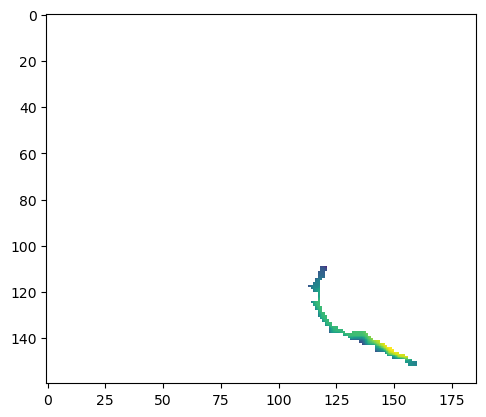

In [144]:
plt.imshow(bt_m6_gom.tob[10,:,:])

In [61]:
sns.violinplot(bt_m6_gom.groupby('time.month').to_dataFrame)

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.